In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [65]:
def generateProg():
    prog = sf.Program(1)
    with prog.context as q:
            #Vac | q[0]
            #Squeeze Gate
            #Sgate(1) | q[0]
            #Displacement Gate
            d = Dgate(1) #z = Re^{iq} q is angle
            d | q[0]
            #Rgate(np.pi) | q[0] #Rotation Gate
            #gamma = 2 #Cubic Phase Gate
            #Vgate(gamma) | q[0]
            kappa = 20#Kerr Gate
            Kgate(kappa) | q[0] #Swirls Probability and Mixes it w/ Origin
    eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
    state = eng.run(prog).state
    return state

In [66]:
def drawState(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

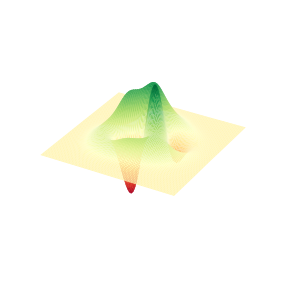

In [67]:
circ = generateProg()
drawState(circ)